## Advait Thergaonkar J057
## Paymanshu Sharma J045

In [1]:
!conda install dask
!conda install -c conda-forge python-graphviz/ pip install graphviz

/bin/bash: conda: command not found
/bin/bash: conda: command not found


In [2]:
!conda install dask                     # either conda install
!python -m pip install dask[dataframe] --upgrade  # or python -m pip install

/bin/bash: conda: command not found
     |████████████████████████████████| 942kB 5.6MB/s 
     |████████████████████████████████| 112kB 13.8MB/s 
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [3]:
!pip install dask[complete]

     |████████████████████████████████| 686kB 5.5MB/s 
ERROR: distributed 2021.4.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [4]:
# importing the multiprocessing module 
import multiprocessing 
import os
def print_cube(num): 
    """ 
    function to print cube of given num 
    """
    print(os.getpid())
    print("Cube: {}".format(num * num * num)) 

def print_square(num): 
    """ 
    function to print square of given num 
    """
    print(os.getpid())
    print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
    # creating processes 
    p1 = multiprocessing.Process(target=print_square, args=(10, )) 
    p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

    # starting process 1 
    p1.start() 
    # starting process 2 
    p2.start() 

    # wait until process 1 is finished 
    p1.join() 
    # wait until process 2 is finished 
    p2.join() 

    # both processes finished 
    print("Done!") 


135
138
Square: 100
Cube: 1000
Done!


In [5]:
from time import sleep

def apply_discount(x):
    sleep(1)
    x = x - 0.3*x
    return x

def get_total(a,b):
    sleep(1)
    return a+b

def total_price(x,y):
    sleep(1)
    a = apply_discount(x)
    b = apply_discount(y)
    print(get_total(a,b))

In [6]:
%%time
a = apply_discount(1000)
b = apply_discount(1000)
get_total(a,b)

CPU times: user 15.4 ms, sys: 667 µs, total: 16 ms
Wall time: 3 s


In [7]:
import dask
from dask import delayed

x = delayed(apply_discount)(1000)
y = delayed(apply_discount)(4000)
z = delayed(total_price)(x, y)

z.visualize()


z.compute()

2450.0


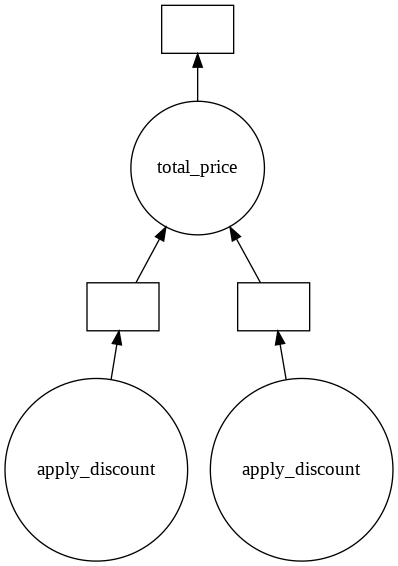

In [8]:
z.visualize()

In [9]:
# Functions to perform mathematics operations
def square(x):
    return x*x

def double(x):
    return x*2

def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = delayed(square)(i)
    b = delayed(double)(i)
    c = delayed(add)(a, b)
    output.append(c)

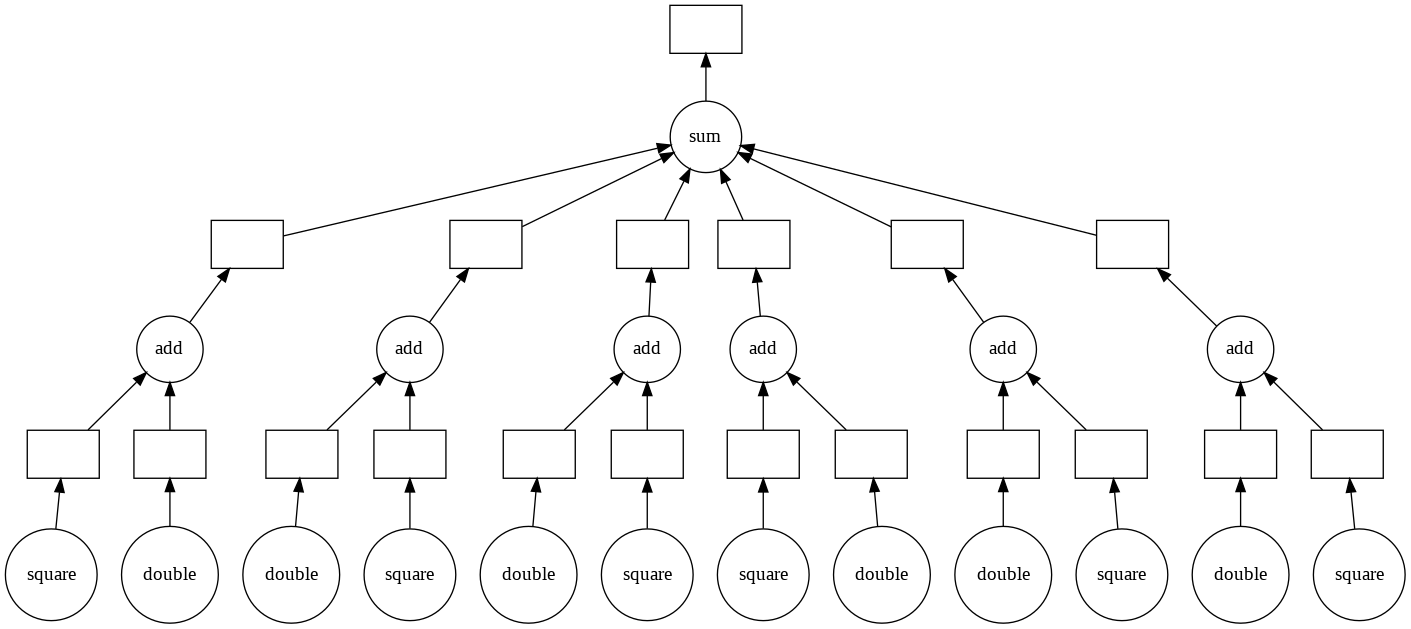

In [10]:
total = delayed(sum)(output)
total.visualize()

In [11]:
import concurrent

In [12]:
import multiprocessing
multiprocessing.cpu_count()

2

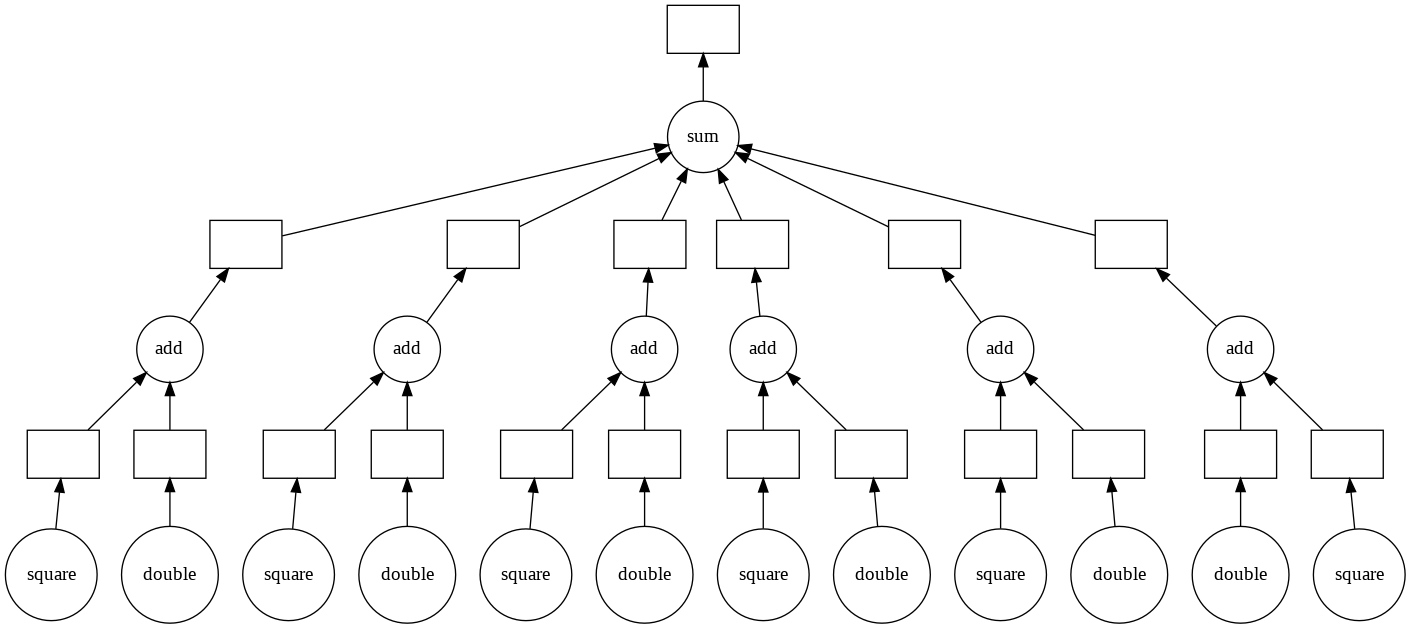

In [13]:
# Functions to perform mathematics operations
@delayed
def square(x):
    return x*x
@delayed
def double(x):
    return x*2
@delayed
def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)

total = delayed(sum)(output)
total.visualize()

In [14]:
import dask.dataframe as dd

In [15]:
dask.__version__

'2021.04.0'

In [16]:
df = dask.datasets.timeseries()

In [17]:
df

,id,name,x,y
npartitions=30,,,,
2000-01-01,int64,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [18]:
df.head()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,997,Ray,-0.086625,0.249393
2000-01-01 00:00:01,983,Edith,0.134881,0.976929
2000-01-01 00:00:02,966,Kevin,0.118629,-0.163929
2000-01-01 00:00:03,1013,Yvonne,-0.487335,0.256698
2000-01-01 00:00:04,991,Yvonne,-0.787654,-0.692245


In [19]:
df1 = df.groupby('name').y.std()

In [20]:
df1

Dask Series Structure:
npartitions=1
    float64
        ...
Name: y, dtype: float64
Dask Name: sqrt, 67 tasks

In [21]:
df1.compute()

name
Alice       0.576108
Bob         0.577955
Charlie     0.576614
Dan         0.577596
Edith       0.578276
Frank       0.576272
George      0.576557
Hannah      0.576176
Ingrid      0.578424
Jerry       0.578225
Kevin       0.577897
Laura       0.577737
Michael     0.578012
Norbert     0.576373
Oliver      0.578577
Patricia    0.576663
Quinn       0.578086
Ray         0.576729
Sarah       0.576866
Tim         0.577736
Ursula      0.577695
Victor      0.577900
Wendy       0.576595
Xavier      0.577515
Yvonne      0.577186
Zelda       0.576064
Name: y, dtype: float64

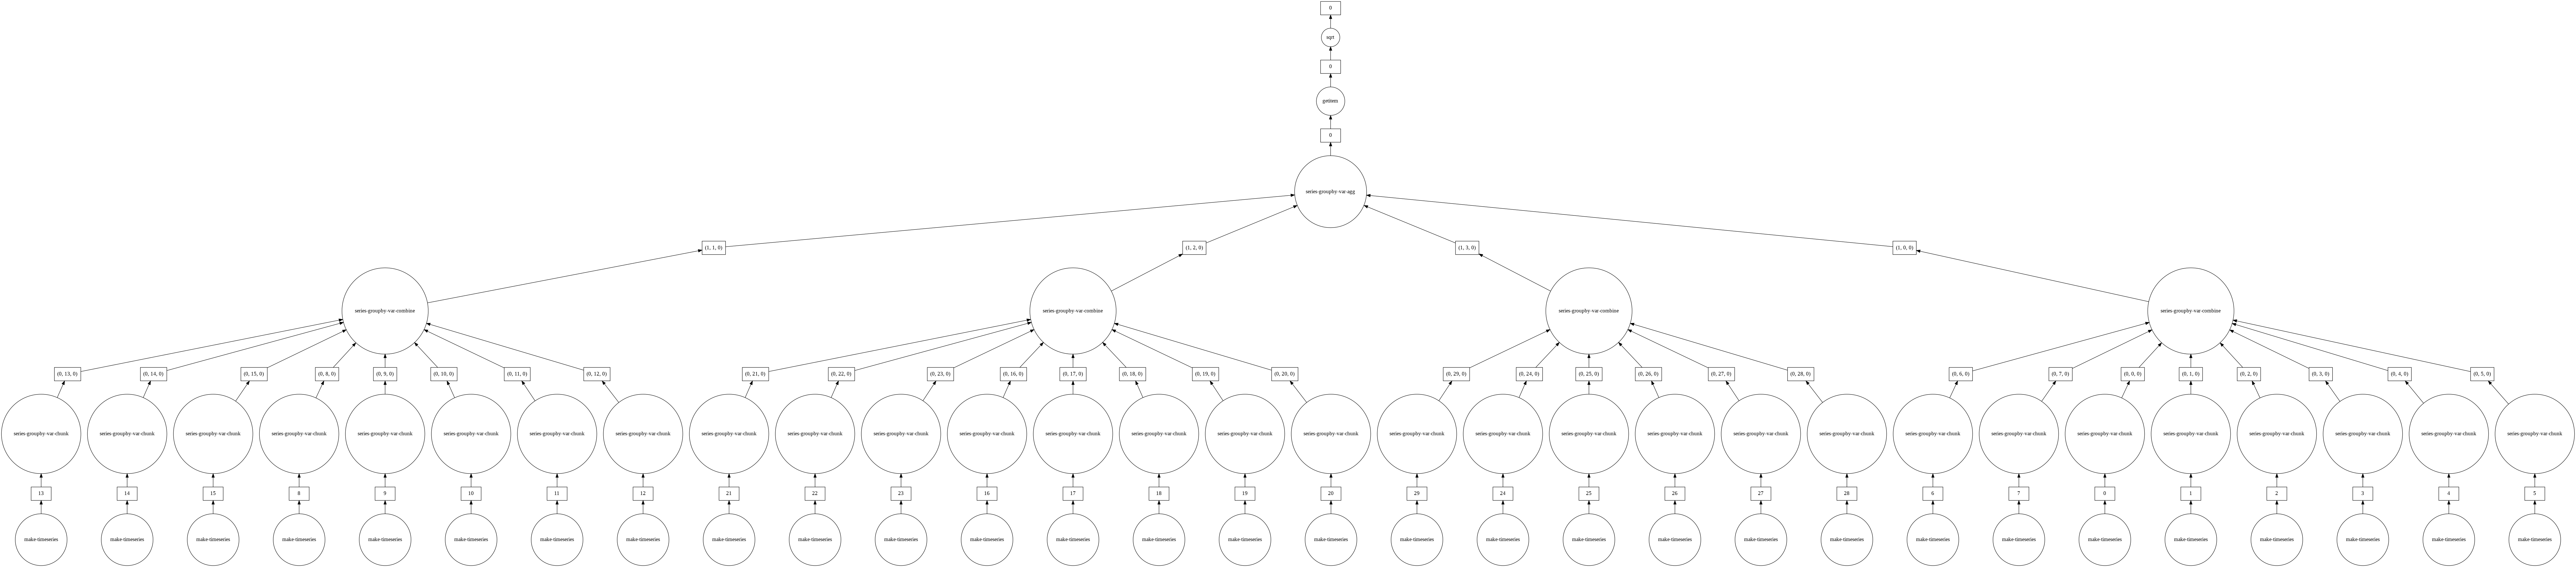

In [22]:
df1.visualize()

In [23]:
%time
df.loc['2000-01-01']

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


,id,name,x,y
npartitions=1,,,,
2000-01-01 00:00:00.000000000,int64,object,float64,float64
2000-01-01 23:59:59.999999999,...,...,...,...


In [24]:
df = df.persist()

In [25]:
%time
df.loc['2000-01-01'].compute()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.72 µs


,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,997,Ray,-0.086625,0.249393
2000-01-01 00:00:01,983,Edith,0.134881,0.976929
2000-01-01 00:00:02,966,Kevin,0.118629,-0.163929
2000-01-01 00:00:03,1013,Yvonne,-0.487335,0.256698
2000-01-01 00:00:04,991,Yvonne,-0.787654,-0.692245
...,...,...,...,...
2000-01-01 23:59:55,985,Michael,-0.061944,0.134649
2000-01-01 23:59:56,982,Tim,0.735783,-0.282537
2000-01-01 23:59:57,970,Dan,0.137063,0.287218


In [26]:
import dask.bag as db


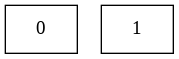

In [27]:
dask_bag = db.from_sequence(['I', 'am', 'learning', 'dask'], partition_size = 2)

dask_bag.visualize() #--->[0] [1]

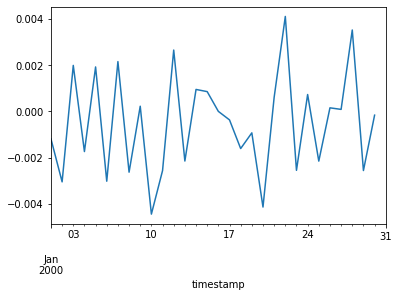

In [28]:
%matplotlib inline
df['y'].resample('24h').mean().compute().plot()

In [29]:
len(df)

2592000

In [33]:
from dask.distributed import Client
import pandas as pd
import time
import numpy as np

In [34]:
client = Client(processes = False)

In [35]:
client

Client Scheduler: inproc://172.28.0.2/60/1 Dashboard: http://172.28.0.2:8787/status,Cluster Workers: 1 Cores: 2 Memory: 12.72 GiB


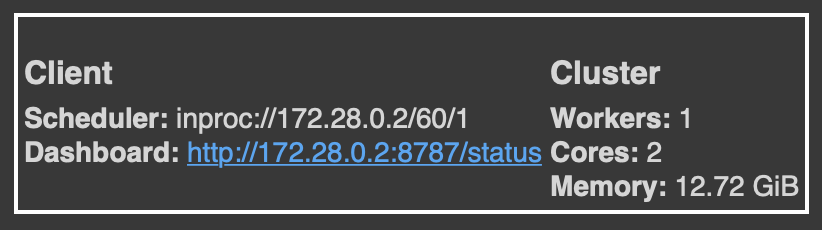

Proof of running it on our systems.
Dask Client does not run on colab

In [36]:
df = pd.DataFrame(np.random.random(size=(10000000, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
df.head()

,param_a,param_b,param_c,param_d
0,0.559437,0.581995,0.705376,0.224212
1,0.857257,0.071722,0.303893,0.034181
2,0.735464,0.999247,0.178823,0.954779
3,0.876273,0.754758,0.075750,0.444246
4,0.929433,0.480722,0.296146,0.074575


In [37]:
def costly_simulation(list_param):
    time.sleep(3)
    return sum(list_param)

In [38]:
%%time
results = []
for col in df.columns:
    result = costly_simulation(df[col].values)
    results.append(result)

CPU times: user 7.61 s, sys: 117 ms, total: 7.73 s
Wall time: 19 s


In [39]:
results

[4999876.344468477, 4999194.273911476, 4999798.011547691, 4999346.029565763]

In [40]:
import dask

In [41]:
%%time
results = []
for col in df.columns:
    result =dask.delayed(costly_simulation)(df[col].values)
    results.append(result)

CPU times: user 2.51 ms, sys: 2.07 ms, total: 4.58 ms
Wall time: 4.21 ms


In [42]:
results[0]

Delayed('costly_simulation-ed52985a-f5fc-4c59-8ed5-9bd6f41d8540')

In [43]:
%time dask.compute(*results)

/usr/local/lib/python3.7/dist-packages/distributed/worker.py:3569: UserWarning: Large object of size 76.29 MiB detected in task graph: 
  (array([0.5594366 , 0.85725745, 0.73546433, ..., 0 ...  0.53578056]),)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s)


CPU times: user 8.16 s, sys: 935 ms, total: 9.09 s
Wall time: 14.7 s


(4999876.344468477, 4999194.273911476, 4999798.011547691, 4999346.029565763)